In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

data = pd.read_csv ('/content/winequality-red.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality num,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [ ]:
classLabel="quality num"
data2 = data.drop(classLabel, axis = 1)

In [ ]:
ClassLabel="quality"
dataFeatures = data2.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

In [ ]:
Features = data2.drop(ClassLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


In [ ]:
dataPhenotypes = data[ClassLabel].values
dataPhenotypes= dataPhenotypes[:r-1]

In [ ]:
dataPhenotypes

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Bad'], dtype=object)

In [ ]:
dataFeatures_train, dataFeatures_test, dataPhenotypes_train, dataPhenotypes_test = train_test_split(dataFeatures, dataPhenotypes, stratify=dataPhenotypes, random_state=1)

In [ ]:
DataPhenotypes_train=LabelBinarizer().fit_transform(dataPhenotypes_train)
DataPhenotypes_test=LabelBinarizer().fit_transform(dataPhenotypes_test)  

In [ ]:
pip install scikit-eLCS

     |████████████████████████████████| 258 kB 5.0 MB/s 
  Created wheel for scikit-eLCS: filename=scikit_eLCS-1.2.3-py3-none-any.whl size=38594 sha256=3a3e3786aaa30e763224d3b3567d754af14dd72762eb20343a4439034ee7a377
  Stored in directory: /root/.cache/pip/wheels/97/97/69/dcb4cf87c2671813c166955429f3fdfff9ece959980c328bfb
Successfully built scikit-eLCS


In [ ]:
l=len(DataPhenotypes_train)
Y=DataPhenotypes_train.reshape(l,)

In [ ]:
from skeLCS import eLCS
model = eLCS(N=10000, learning_iterations = 10000,nu = 10,selection_method='tournament',track_accuracy_while_fit=True)
trainedModel = model.fit(dataFeatures_train,Y)

In [ ]:
trainedModel.export_iteration_tracking_data("iterationData_wine_quality.csv")

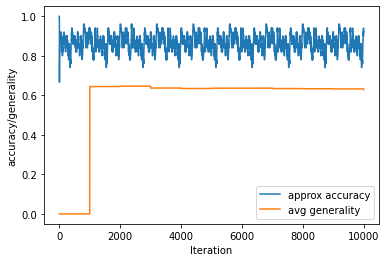

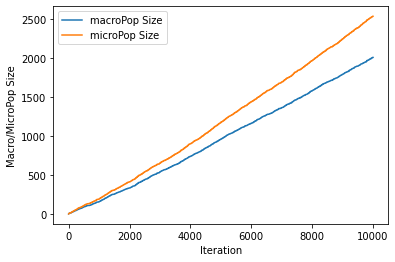

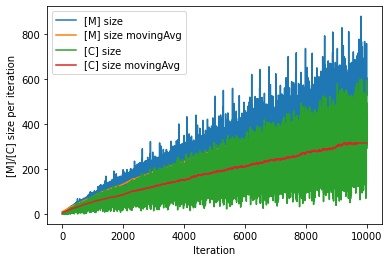

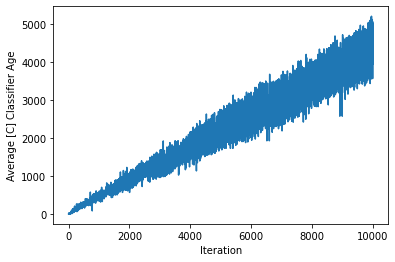

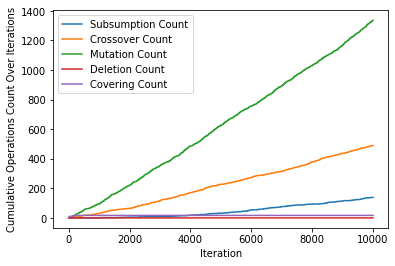

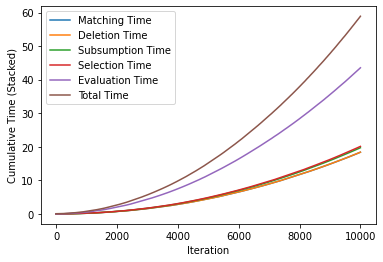

In [ ]:
import matplotlib.pyplot as plt

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_wine_quality.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
cSize = dataTracking["Correct Set Size"].values
experience = dataTracking["Average Iteration Age of Correct Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total Selection Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,cSize,label="[C] size")
plt.plot(iterations,movingAvg(cSize),label="[C] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[C] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [C] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="Selection Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [ ]:
trainedModel.export_final_rule_population(Features,ClassLabel,filename="RulePopulationWineQualiyRed.csv",DCAL=False)

populationData2 = pd.read_csv("RulePopulationWineQualiyRed.csv")
display(populationData2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,"6.184000000000001,13.416","-0.0126,0.8926000000000001",#,"0.6020000000000001,4.398","-0.10472000000000001,0.23072","-17.27,35.269999999999996",#,"0.9963294,0.9998705999999999","2.8835,3.5965000000000003",#,#,0.0,4.023703e-01,0.912983,3,683.011738,9976,0,0.636364,NaN,3924,4298
1,"5.465999999999999,9.534",#,#,#,#,#,#,"0.9904692,0.9997307999999999",#,"0.05425000000000002,1.2257500000000001","9.57,12.43",1.0,1.764981e-09,0.133252,2,680.536479,9952,1,0.363636,NaN,656,4923
2,#,"0.4338,1.0762",#,"-2.3259999999999996,6.726","0.06713499999999999,0.22886499999999999","-16.625,36.625",#,#,#,#,"8.51,11.889999999999999",0.0,6.276974e-01,0.954498,1,686.494278,9996,2,0.454545,NaN,4573,4791
3,#,#,"0.37570000000000003,0.6443","-2.291,7.491","-0.08577000000000001,0.18977",#,#,"0.990914,0.999086",#,#,#,1.0,1.779189e-06,0.266086,1,731.957085,9991,3,0.363636,NaN,550,2067
4,#,#,"0.19955,0.76045","0.27500000000000013,3.925",#,#,#,#,"2.833,3.247","0.72475,1.33525",#,0.0,3.714951e-02,0.719441,2,473.964260,9923,4,0.363636,NaN,618,859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,#,#,#,#,#,#,#,#,#,#,"8.094999999999999,11.415000000000001",1.0,0.000000e+00,0.000000,1,691.669879,9976,9976,0.090909,NaN,0,18
2007,#,"-0.11989999999999995,0.7999","0.37570000000000003,0.62095","-3.302,7.502000000000001",#,#,"-48.48,13.268954140994829",#,#,#,"11.903807709799151,13.995000000000001",1.0,4.189039e-02,0.916667,1,756.405184,9991,9991,0.454545,NaN,0,0
2008,#,#,#,"-3.302,7.502000000000001",#,#,#,"0.9910388,0.9981212","2.9585000000000004,3.4415","0.60375,1.01625","11.903807709799151,13.995000000000001",1.0,1.000000e+00,1.000000,1,898.000000,9991,9991,0.454545,NaN,1,1
2009,"2.457718869710919,9.0905",#,#,"-3.183,7.183",#,#,#,"0.9878370011094074,0.9981835",#,#,#,0.0,1.000000e+00,1.000000,1,732.000000,9996,9996,0.272727,NaN,2,2


In [ ]:
trainedModel.export_final_rule_population(Features,ClassLabel,filename="RulePopulationWineQualiyRed2.csv")

populationData3 = pd.read_csv("RulePopulationWineQualiyRed2.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,quality,Fitness,Accuracy,Numerosity,Avg Match Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Correct Count,Match Count
0,"[6.184000000000001,13.416], [-0.0126,0.8926000...","fixed acidity, volatile acidity, residual suga...",0.0,4.023703e-01,0.912983,3,683.011738,9976,0,0.636364,NaN,3924,4298
1,"[5.465999999999999,9.534], [0.9904692,0.999730...","fixed acidity, density, sulphates, alcohol",1.0,1.764981e-09,0.133252,2,680.536479,9952,1,0.363636,NaN,656,4923
2,"[0.4338,1.0762], [-2.3259999999999996,6.726], ...","volatile acidity, residual sugar, chlorides, f...",0.0,6.276974e-01,0.954498,1,686.494278,9996,2,0.454545,NaN,4573,4791
3,"[0.37570000000000003,0.6443], [-2.291,7.491], ...","citric acid, residual sugar, chlorides, density",1.0,1.779189e-06,0.266086,1,731.957085,9991,3,0.363636,NaN,550,2067
4,"[0.19955,0.76045], [0.27500000000000013,3.925]...","citric acid, residual sugar, pH, sulphates",0.0,3.714951e-02,0.719441,2,473.964260,9923,4,0.363636,NaN,618,859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,"[8.094999999999999,11.415000000000001]",alcohol,1.0,0.000000e+00,0.000000,1,691.669879,9976,9976,0.090909,NaN,0,18
2007,"[-0.11989999999999995,0.7999], [0.375700000000...","volatile acidity, citric acid, residual sugar,...",1.0,4.189039e-02,0.916667,1,756.405184,9991,9991,0.454545,NaN,0,0
2008,"[-3.302,7.502000000000001], [0.9910388,0.99812...","residual sugar, density, pH, sulphates, alcohol",1.0,1.000000e+00,1.000000,1,898.000000,9991,9991,0.454545,NaN,1,1
2009,"[2.457718869710919,9.0905], [-3.183,7.183], [0...","fixed acidity, residual sugar, density",0.0,1.000000e+00,1.000000,1,732.000000,9996,9996,0.272727,NaN,2,2


In [ ]:
l1=len(DataPhenotypes_test)
Y_test=DataPhenotypes_test.reshape(l1,)

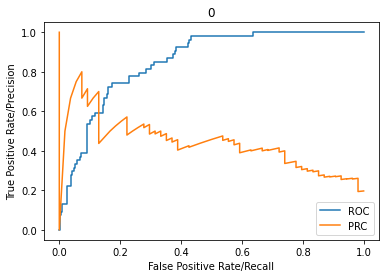

PRC AUC:0.4326249606633242
ROC AUC:0.8531898950974095


<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, probs[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test, probs[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()
plt.savefig("Vgg19CNNClass0.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [ ]:
probs

array([[9.99911698e-01, 8.83015821e-05],
       [9.99997579e-01, 2.42062772e-06],
       [9.99868724e-01, 1.31276479e-04],
       ...,
       [9.99862206e-01, 1.37794237e-04],
       [9.99943420e-01, 5.65804797e-05],
       [9.99997826e-01, 2.17374453e-06]])

In [ ]:
Y_test

array([0, 0, 0, ..., 0, 1, 0])